Розробити програмний скрипт з функціоналом:
- самостійно обрати файл цифрового зображення;
- побудувати гістограму яскравості усього зображення;
- побудувати гістограми яскравостей для сегменту – об’єктів ідентифікації
- здійснити кольорову корекцію усього зображення з використанням метода лінеаризації гістограми яскравості;
- здійснити кольорову корекцію сегменту зображення з використанням метода лінеарізації гістограми яскравості.


### Import libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def plot_hist(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

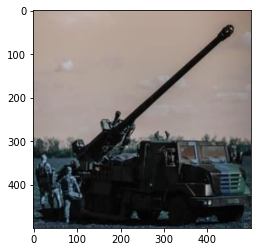

In [3]:
img = cv2.imread('image.jpg')
img = cv2.resize(img, (500, 500))
plt.imshow(img)

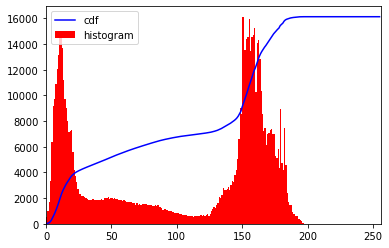

In [4]:
plot_hist(img)

### Segment correction

In [5]:
segment = img[300:500, 200:500]

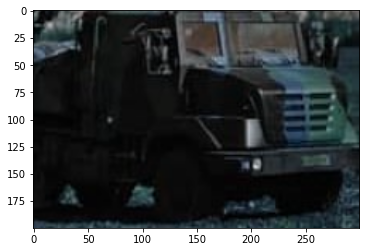

In [6]:
plt.imshow(segment)

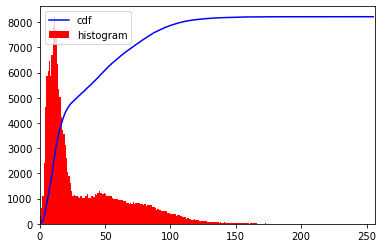

In [7]:
plot_hist(segment)

In [8]:
# Function for linear correction
def get_linearized_img(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    return cdf[img]

In [9]:
segment2 = get_linearized_img(segment)

In [10]:
new_image = img.copy()

In [11]:
new_image[300:500, 200:500] = segment2

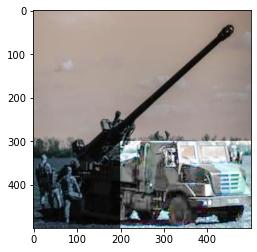

In [12]:
plt.imshow(new_image)

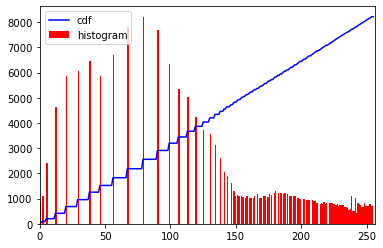

In [13]:
plot_hist(segment2)

### Whole image corection

In [14]:
img2 = get_linearized_img(img)

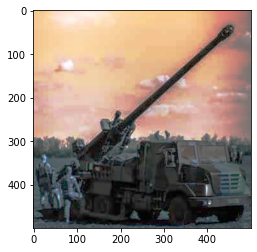

In [15]:
plt.imshow(img2)

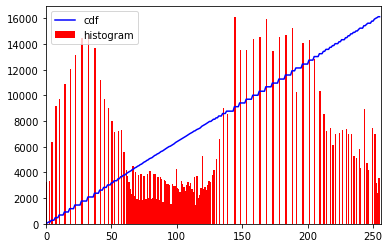

In [16]:
plot_hist(img2)